**Project Machine Learning : Prediksi Penyakit Diabetes**

1. Latar Belakang

Stroke adalah penyakit yang menyerang sistem peredaran darah otak dan menjadi salah satu penyebab utama kematian dan kecacatan di Indonesia. Menurut WHO, stroke menyumbang lebih dari 10% dari total kematian global. Dengan meningkatnya usia harapan hidup dan gaya hidup yang semakin tidak sehat, penting untuk menerapkan sistem deteksi dini terhadap risiko stroke.

2. Tujuan

Tujuan utama dari proyek ini adalah untuk Membangun sistem prediksi berbasis machine learning untuk mengklasifikasikan apakah seseorang berisiko mengalami stroke, berdasarkan riwayat medis dan atribut gaya hidup.

In [5]:
dataset_path = "/content/healthcare-dataset-stroke-data.csv"

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [7]:
import pandas as pd
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Data Understanding**

Dataset yang digunakan adalah "Stroke Prediction Dataset" yang tersedia di platform Kaggle. Dataset ini berisi data pasien yang mencakup informasi demografis, status medis, dan gaya hidup yang relevan dengan risiko stroke.

**Informasi Dataset**

- Jumlah Data: 5.110 sampel
- Jumlah Kolom: 12 Kolom
- Sumber Data: Kaggle - Diabetes Prediction Dataset

**Deskripsi Fitur**

Berikut adalah penjelasan setiap fitur dalam dataset ini:
1. gender = Jenis kelamin pasien (Male/Female/Other)
2. age	= Usia pasien dalam tahun
hypertension	Riwayat hipertensi (1 = Ya, 0 = Tidak)
3. heart_disease	= Riwayat penyakit jantung (1 = Ya, 0 = Tidak)
4. ever_married	= Status pernikahan pasien (Yes/No)
5. work_type	= Jenis pekerjaan pasien
6. Residence_type	= Lokasi tempat tinggal pasien (Urban/Rural)
7. avg_glucose_level	= Kadar rata-rata glukosa darah (mg/dL)
8. bmi	= Indeks massa tubuh (kg/m2)
9. smoking_status	= Status kebiasaan merokok pasien
10. stroke	= Target klasifikasi: 1 = Terkena Stroke, 0 = Tidak


In [11]:
# Mengecek apakah ada missing values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


**Exploratory Data Analysis (EDA)**

Tahap Exploratory Data Analysis (EDA) dilakukan untuk memahami pola distribusi data, hubungan antar fitur, serta mendeteksi potensi masalah seperti data imbalance.

**Visualisasi Distribusi Data**

- Histogram: Untuk memvisualisasikan distribusi age, avg_glucose_level, dan bmi. Hasilnya menunjukkan bahwa sebagian besar pasien stroke berada di atas usia 60 tahun dan memiliki kadar glukosa tinggi.
- Bar chart: Untuk melihat proporsi data kategorikal seperti gender, work_type, dan smoking_status. Terlihat bahwa mayoritas pasien stroke adalah mereka yang pernah merokok atau berstatus "unknown".
- Pie chart: Untuk melihat distribusi target stroke. Hasilnya menunjukkan proporsi kelas target sangat tidak seimbang, dengan mayoritas pasien tidak mengalami stroke.


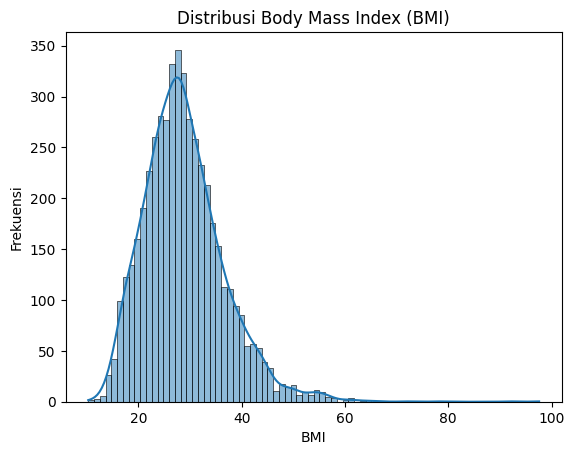

In [13]:
# Visualisasi distribusi BMI
sns.histplot(df['bmi'], kde=True)
plt.title("Distribusi Body Mass Index (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.show()

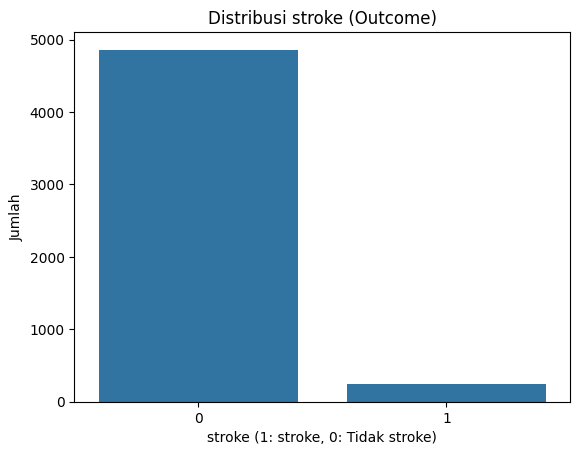

In [14]:
# Visualisasi distribusi diabetes
sns.countplot(x='stroke', data=df)
plt.title("Distribusi stroke (Outcome)")
plt.xlabel("stroke (1: stroke, 0: Tidak stroke)")
plt.ylabel("Jumlah")
plt.show()

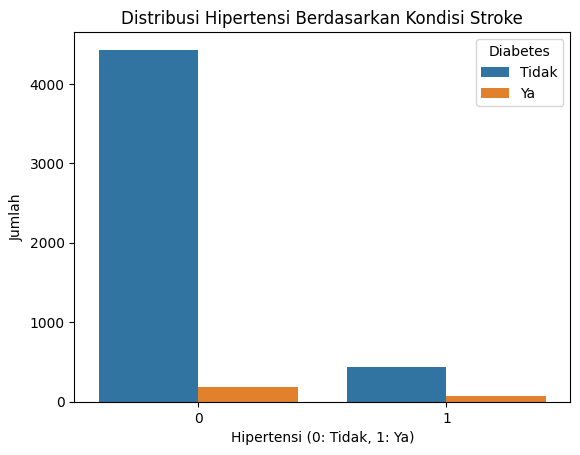

In [15]:
# Visualisasi hubungan hipertensi dan diabetes
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title("Distribusi Hipertensi Berdasarkan Kondisi Stroke")
plt.xlabel("Hipertensi (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah")
plt.legend(title="Diabetes", labels=["Tidak", "Ya"])
plt.show()


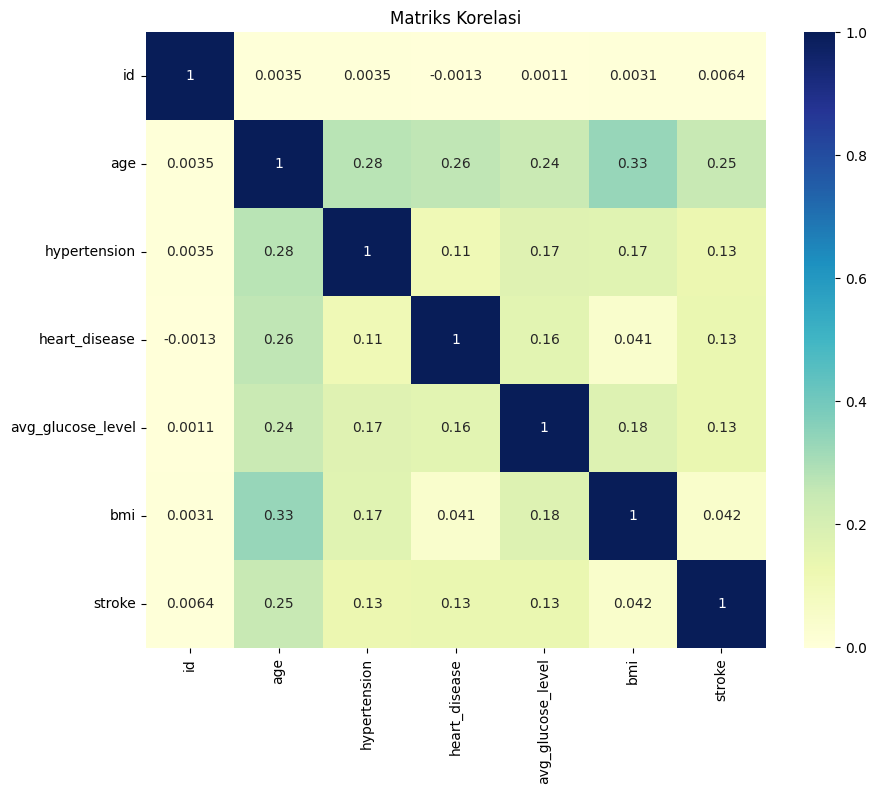

In [16]:
# Mengambil hanya kolom numerik untuk perhitungan korelasi
numeric_data = df.select_dtypes(include=[float, int])

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi")
plt.show()

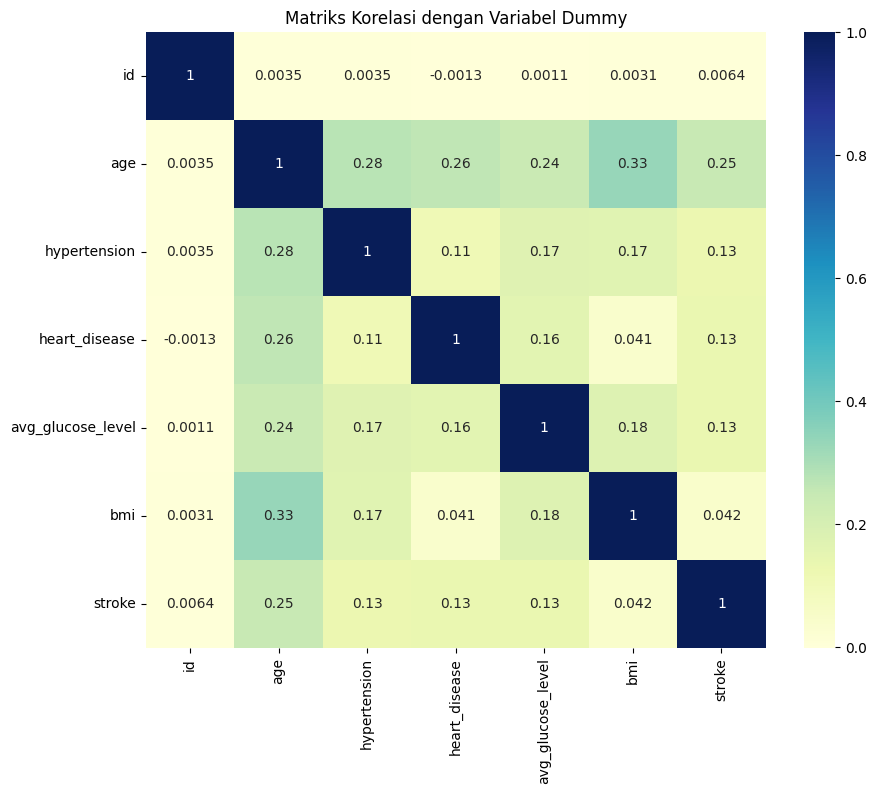

In [17]:
# Mengonversi kolom kategori menjadi variabel dummy
data_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Mengambil hanya kolom numerik
numeric_data = data_encoded.select_dtypes(include=[float, int])

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi dengan Variabel Dummy")
plt.show()

In [18]:
# Mengonversi kolom kategori menjadi variabel dummy
data_encoded = pd.get_dummies(df, columns=['gender', 'smoking_status'], drop_first=True)

In [19]:
# Memisahkan fitur (X) dan target (y)
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

In [20]:
!pip install scikit-learn

In [21]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Encode 'ever_married' (binary column)
le = LabelEncoder()
X['ever_married'] = le.fit_transform(X['ever_married'])

# One-hot encode 'work_type' and 'Residence_type'
X = pd.get_dummies(X, columns=['work_type', 'Residence_type'], drop_first=True)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menerapkan normalisasi pada fitur numerik
X_scaled = scaler.fit_transform(X)

# Jika ingin hasilnya dalam bentuk DataFrame kembali
X = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Melihat beberapa baris pertama dari data yang telah diproses
data_encoded.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,True,False,True,False,False
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1,False,False,False,True,False
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,True,False,False,True,False
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,False,False,False,False,True
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,False,False,False,True,False


In [24]:
# Melihat data setelah normalisasi
pd.DataFrame(X_scaled, columns=X.columns).head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,0.123214,0.816895,0.0,1.0,1.0,0.801265,0.301260,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.708205,0.743652,0.0,0.0,1.0,0.679023,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.426015,0.975586,0.0,1.0,1.0,0.234512,0.254296,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.824928,0.597168,0.0,0.0,1.0,0.536008,0.276060,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.021929,0.963379,1.0,0.0,1.0,0.549349,0.156930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
# Memeriksa bentuk data latih dan data uji
print("Data latih (X_train):", X_train.shape)
print("Data uji (X_test):", X_test.shape)
print("Target latih (y_train):", y_train.shape)
print("Target uji (y_test):", y_test.shape)

Data latih (X_train): (4088, 17)
Data uji (X_test): (1022, 17)
Target latih (y_train): (4088,)
Target uji (y_test): (1022,)


In [26]:

# Melihat distribusi target pada data latih dan data uji
print("Distribusi target pada data latih:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi target pada data uji:")
print(y_test.value_counts(normalize=True))

Distribusi target pada data latih:
stroke
0    0.954256
1    0.045744
Name: proportion, dtype: float64

Distribusi target pada data uji:
stroke
0    0.939335
1    0.060665
Name: proportion, dtype: float64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Inisialisasi imputer (mengisi nilai NaN dengan nilai rata-rata)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi pada data latih dan data uji
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Inisialisasi dan pelatihan model Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_imputed, y_train)

# Prediksi dengan Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_imputed)

# Evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"Logistic Regression - Akurasi: {accuracy_logreg:.2f}, F1 Score: {f1_logreg:.2f}")

Logistic Regression - Akurasi: 0.94, F1 Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan pelatihan model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Akurasi: {accuracy_rf:.2f}, F1 Score: {f1_rf:.2f}")

Random Forest - Akurasi: 0.94, F1 Score: 0.03


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Inisialisasi imputer (mengisi nilai NaN dengan nilai rata-rata)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi pada data latih dan data uji
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inisialisasi dan pelatihan model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_imputed, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test_imputed)

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Akurasi: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")

SVM - Akurasi: 0.94, F1 Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Inisialisasi imputer (mengisi nilai NaN dengan nilai rata-rata)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi pada data latih dan data uji
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inisialisasi dan pelatihan model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_imputed, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test_imputed)

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Akurasi: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")

SVM - Akurasi: 0.94, F1 Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
!pip install google protobuf

In [36]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [38]:
model_dl = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model_dl.fit(X_train_imputed, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9206 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9517 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9531 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9591 - loss: nan - val_accuracy: 0.9548 - val_loss: nan
Epoch 9/20
103/103 ━━━━━

In [41]:
loss, accuracy_dl = model_dl.evaluate(X_test, y_test)
print(f"Deep Learning Model - Akurasi: {accuracy_dl:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9405 - loss: nan
Deep Learning Model - Akurasi: 0.94


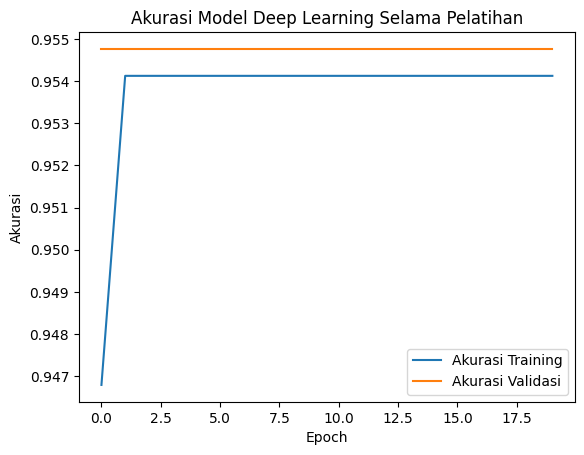

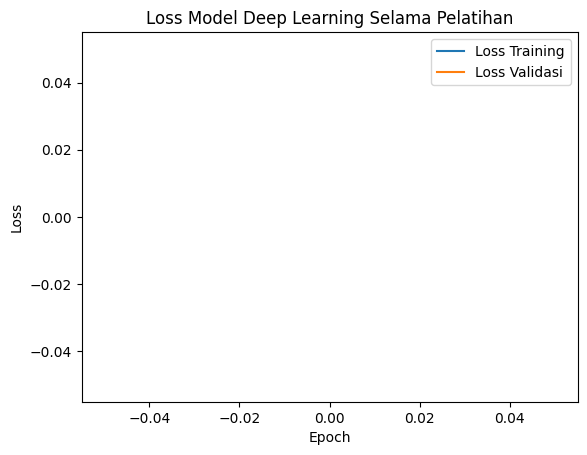

In [43]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Akurasi Model Deep Learning Selama Pelatihan')
plt.show()

# Grafik Loss
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Model Deep Learning Selama Pelatihan')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Inisialisasi imputer (mengisi nilai NaN dengan nilai rata-rata)
# Menggunakan imputer yang sudah di-fit pada data latih
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train) # Fit imputer on training data

# Transform data uji
X_test_imputed = imputer.transform(X_test)


# Dictionary untuk menyimpan hasil setiap model
results = {}

# Evaluasi Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_imputed)
results['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_logreg)
]

# Evaluasi Random Forest
# Random Forest can handle NaN, but we already imputed for other models, so using imputed data for consistency
y_pred_rf = rf_model.predict(X_test_imputed)
results['Random Forest'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Evaluasi SVM
y_pred_svm = svm_model.predict(X_test_imputed)
results['SVM'] = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]

# Evaluasi Deep Learning
y_pred_dl = (model_dl.predict(X_test_imputed) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner
results['Deep Learning'] = [
    accuracy_score(y_test, y_pred_dl),
    precision_score(y_test, y_pred_dl),
    recall_score(y_test, y_pred_dl),
    f1_score(y_test, y_pred_dl)
]

 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
import pandas as pd

# Konversi hasil ke dalam DataFrame untuk tabel
results_df = pd.DataFrame(results, index=['Akurasi', 'Precision', 'Recall', 'F1 Score']).T
results_df

,Akurasi,Precision,Recall,F1 Score
Logistic Regression,0.939335,0.0,0.0,0.0
Random Forest,0.939335,0.0,0.0,0.0
SVM,0.939335,0.0,0.0,0.0
Deep Learning,0.939335,0.0,0.0,0.0


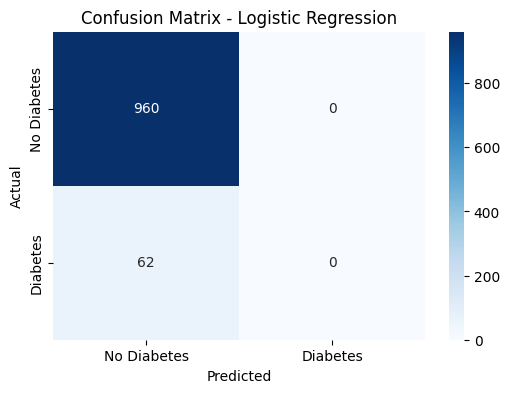

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh Confusion Matrix untuk Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_imputed)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

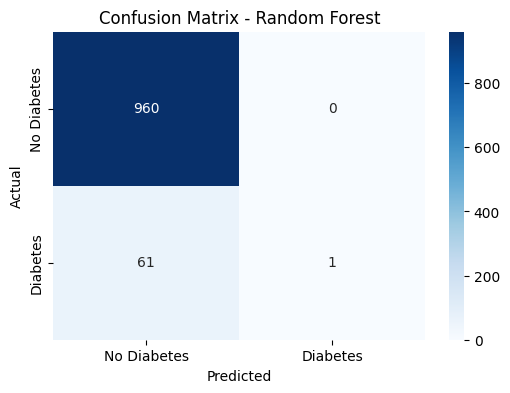

In [49]:
# Prediksi menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Membuat Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

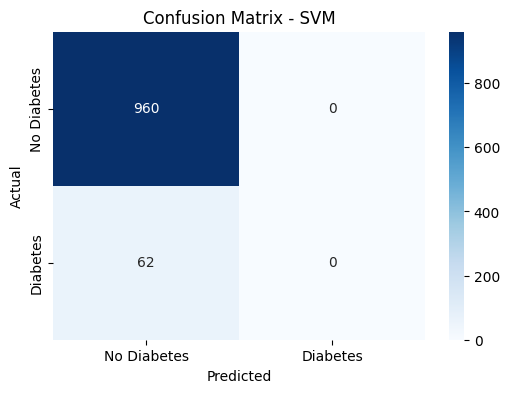

In [51]:
# Prediksi menggunakan SVM
y_pred_svm = svm_model.predict(X_test_imputed)

# Membuat Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


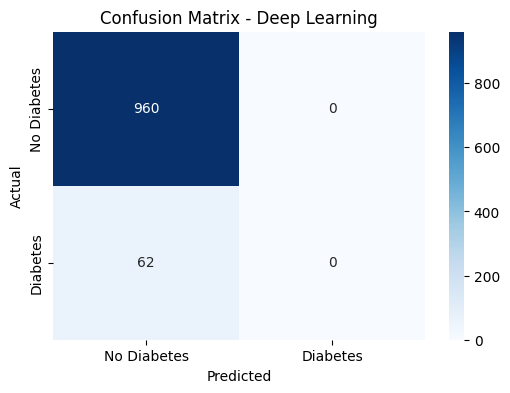

In [52]:
# Prediksi menggunakan model Deep Learning
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner

# Membuat Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


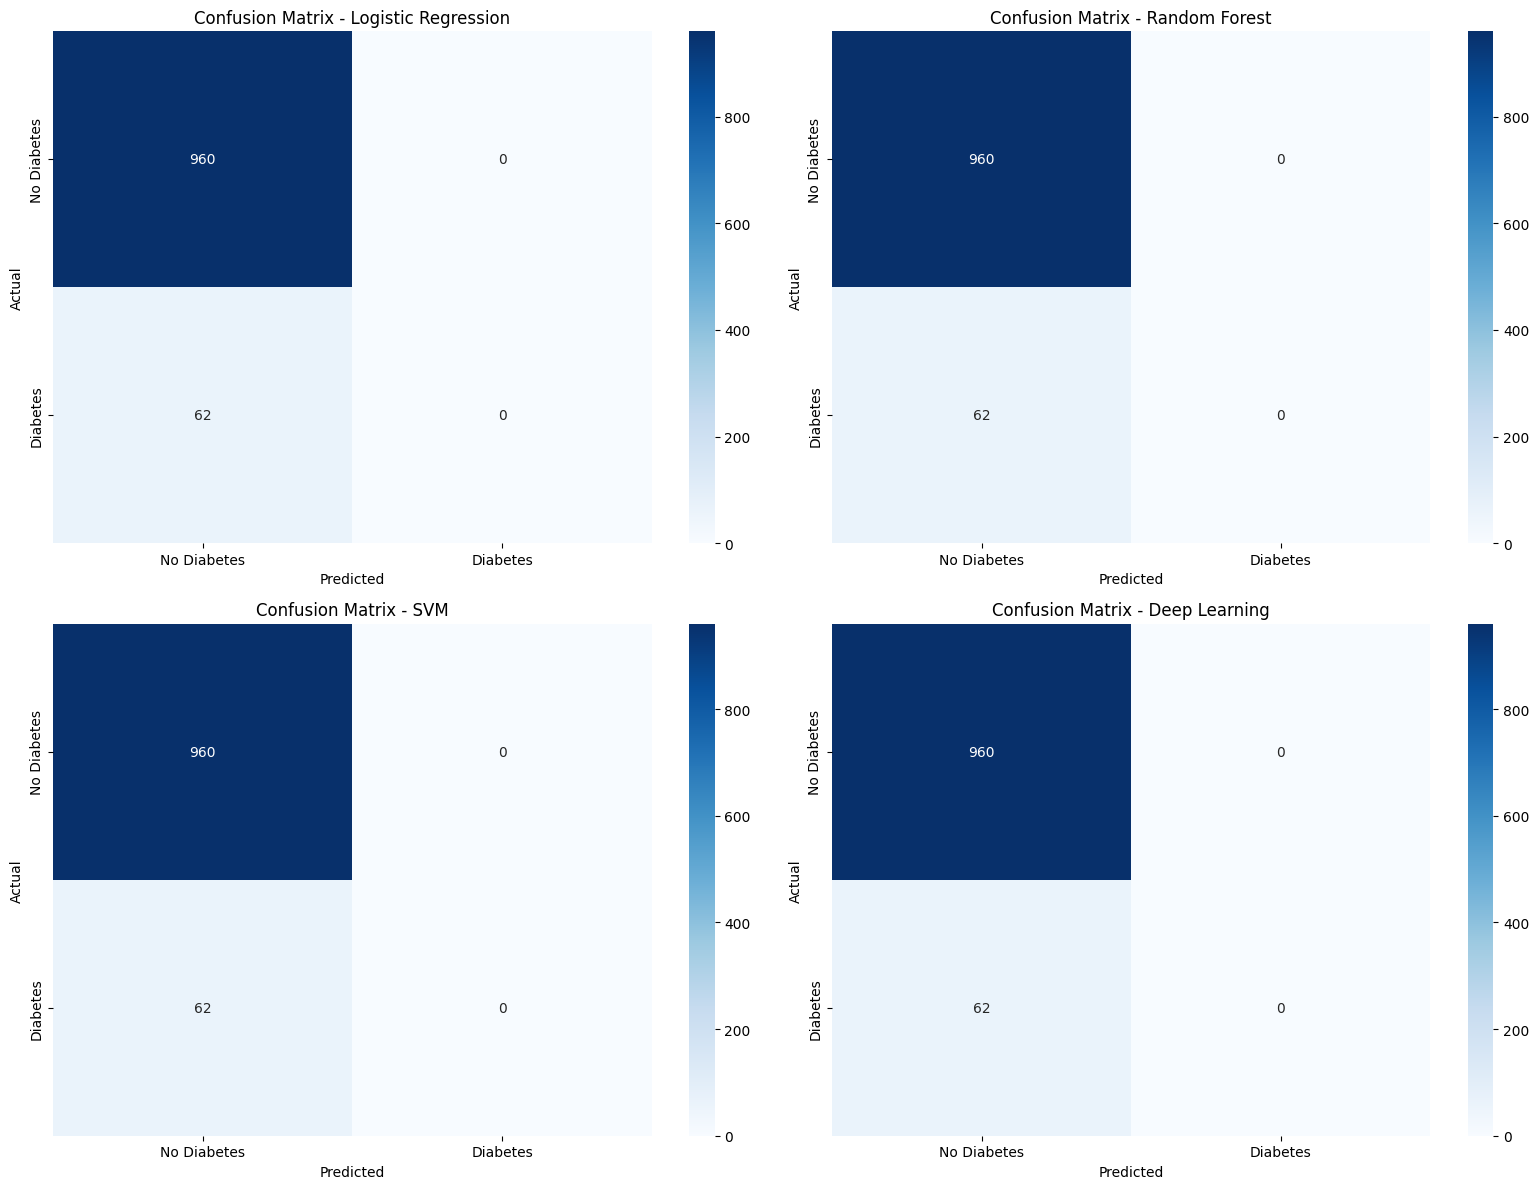

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi untuk setiap model
y_pred_logreg = logreg_model.predict(X_test_imputed)
y_pred_rf = rf_model.predict(X_test_imputed)
y_pred_svm = svm_model.predict(X_test_imputed)
y_pred_dl = (model_dl.predict(X_test_imputed) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner

# Membuat Confusion Matrix untuk setiap model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Membuat subplots untuk menampilkan keempat Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix untuk Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Confusion Matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - Random Forest')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Confusion Matrix untuk SVM
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - SVM')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Confusion Matrix untuk Deep Learning
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Deep Learning')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Menampilkan semua Confusion Matrix
plt.tight_layout()
plt.show()

In [55]:
import joblib

# Menyimpan model Logistic Regression
joblib.dump(logreg_model, 'logistic_regression_model.pkl')

# Menyimpan model Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

# Menyimpan model SVM
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

Batas

In [56]:
# Cek missing value
print(df.isnull().sum())

# Imputasi nilai NaN pada kolom BMI
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [57]:
# Label encoding untuk kolom biner
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

# One-hot encoding untuk kolom multikategori
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

In [58]:
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [59]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

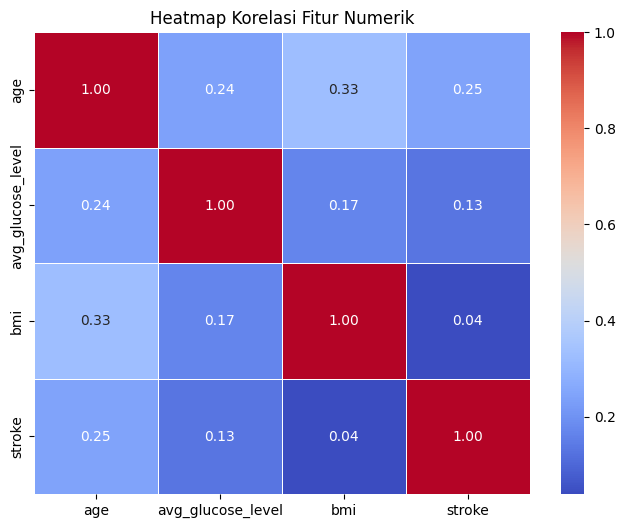

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
numeric_features = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Hitung korelasi
correlation_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [61]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.816895,0,1,1,1,0.801265,0.301260,1,False,False,True,False,False,False,True,False,False
1,51676,0,0.743652,0,0,1,0,0.679023,0.212981,1,False,False,False,True,False,False,False,True,False
2,31112,1,0.975586,0,1,1,0,0.234512,0.254296,1,False,False,True,False,False,False,False,True,False
3,60182,0,0.597168,0,0,1,1,0.536008,0.276060,1,False,False,True,False,False,False,False,False,True
4,1665,0,0.963379,1,0,1,0,0.549349,0.156930,1,False,False,False,True,False,False,False,True,False


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Training Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

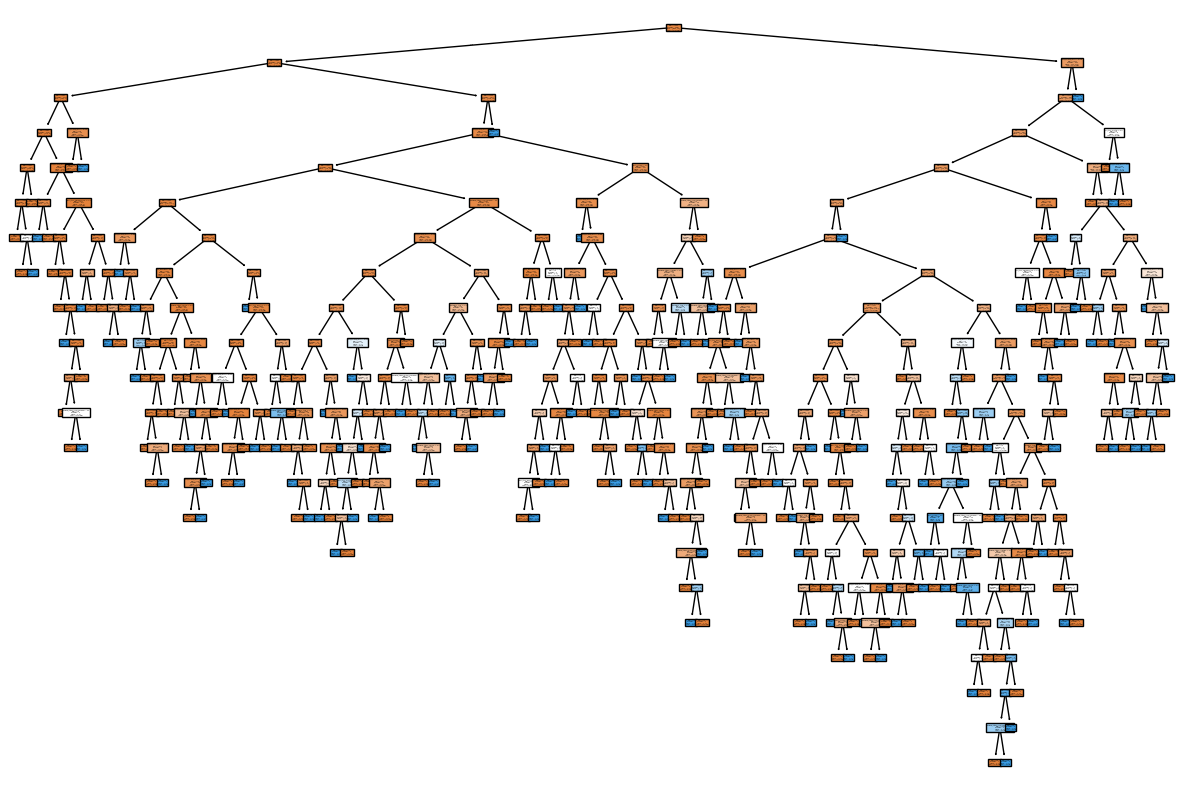

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Stroke", "Stroke"])
plt.show()


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
